In [3]:
# install rlibkriging
#install.packages('devtools')
devtools::install_github('libKriging/rlibkriging')

Reading package lists...
Building dependency tree...
Reading state information...
r-cran-devtools is already the newest version (2.4.3-1cran1.1804.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.



'/usr/bin/git' clone --depth 1 --no-hardlinks --recurse-submodules https://github.com/libKriging/libKriging /tmp/RtmpPhiT8S/remotes47172aaac1/libKriging-rlibkriging-84b9cbe/src/libK




* checking for file ‘/tmp/RtmpPhiT8S/remotes47172aaac1/libKriging-rlibkriging-84b9cbe/DESCRIPTION’ ... OK
* preparing ‘rlibkriging’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* running ‘cleanup’
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* creating default NAMESPACE file
* building ‘rlibkriging_0.7-0.tar.gz’
Warning in utils::tar(filepath, pkgname, compression = compression, compression_level = 9L,  :
  storing paths of more than 100 bytes is not portable:
  ‘rlibkriging/src/libK/dependencies/Catch2/include/internal/benchmark/detail/catch_benchmark_function.hpp’
Warning in utils::tar(filepath, pkgname, compression = compression, compression_level = 9L,  :
  storing paths of more than 100 bytes is not portable:
  ‘rlibkriging/src/libK/dependencies/Catch2/include/internal/benchmark/detail/catch_run_for_at_least.hpp’
Warning in utils::tar(filepath, pkgname, compression = compression, compressi

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* data: 5x[0,1] -> 5x[0.030241,0.772403]
* trend constant (est.): 0.46971
* variance (est.): 0.0786585
* covariance:
  * kernel: gauss
  * range (est.): 0.234775
  * fit:
    * objective: LL
    * optim: BFGS


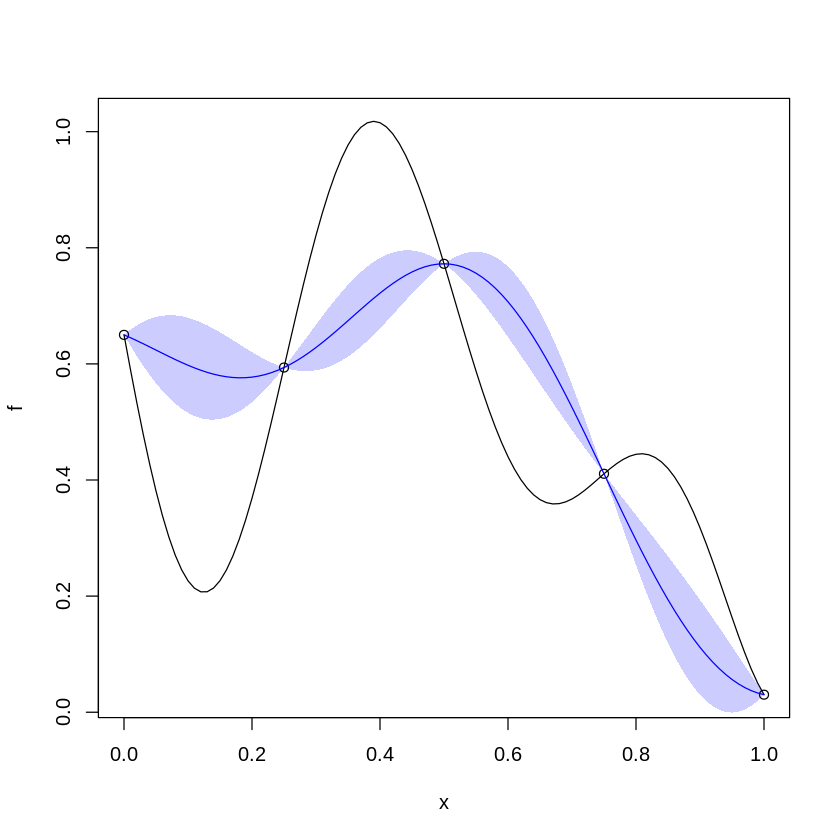

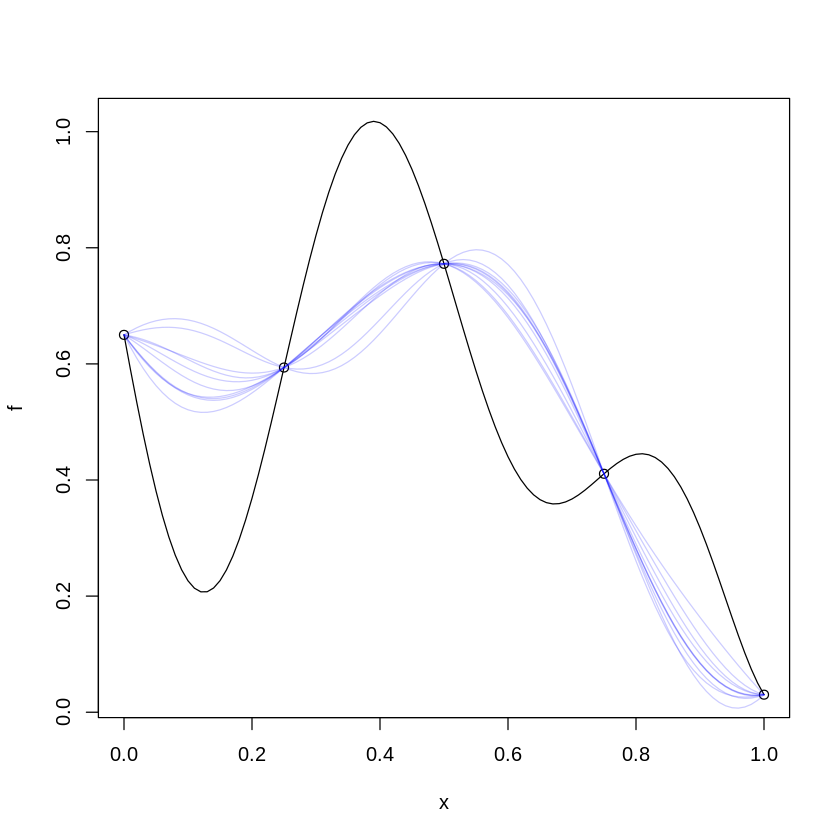

In [4]:
X <- as.matrix(c(0.0, 0.25, 0.5, 0.75, 1.0))
f <- function(x) 1 - 1 / 2 * (sin(12 * x) / (1 + x) + 2 * cos(7 * x) * x^5 + 0.7)
y <- f(X)

library(rlibkriging)
k_R <- Kriging(y, X, "gauss")
print(k_R)

# you can also check logLikelihood using:
# ll = function(t) logLikelihoodFun(k_R,t)$logLikelihood; plot(ll)

x <- as.matrix(seq(0, 1, , 101))
p <- predict(k_R, x, TRUE, FALSE)

plot(f)
points(X, y)
lines(x, p$mean, col = 'blue')
polygon(c(x, rev(x)), c(p$mean - 2 * p$stdev, rev(p$mean + 2 * p$stdev)), border = NA, col = rgb(0, 0, 1, 0.2))

s <- simulate(k_R,nsim = 10, seed = 123, x=x)

plot(f)
points(X,y)
matplot(x,s,col=rgb(0,0,1,0.2),type='l',lty=1,add=T)